### 1) Tính các đại lượng thống kê mô tả từ đó rút ra nhận xét về từng tập dữ liệu (cân nặng của trẻ trong trường hợp bà mẹ hút thuốc và cân nặng của trẻ trong trường hợp bà mẹ không hút thuốc)
1.Mô tả dữ liệu bằng các giá trị số

In [49]:
import pandas as pd # Gọi thư viện pandas gán pd
import numpy as np # Gọi thư viện numpy gán np
from scipy.stats import skew, kurtosis # Từ scipy.stats gọi skew, kurtosis
import matplotlib.pyplot as plt # Gọi thư viện matplotlib.pyplot gán plt
import scipy.stats as stats # Gọi thư viện scipy.stats

In [50]:
# Đọc dữ liệu file babies.txt
df = pd.read_csv('babies.txt', delim_whitespace=True)

# TH1: Cân nặng của trẻ trong trường hợp bà mẹ hút thuốc khi mang thai
smokers = df[df['smoke'] == 1]['bwt'] # Lọc hàng có giá trị smoke= 1 và lấy cột bwt 
# TH2:  Cân nặng của trẻ trong trường hợp bà mẹ không hút thuốc khi mang thai
non_smokers = df[df['smoke'] == 0]['bwt'] # Lọc hàng có giá trị smoke= 0 và lấy cột bwt 

def statistics(data):  # Định nghĩa hàm statistics 
    count = len(data) # đếm số lượng phần tử
    Min = data.min() # lấy giá trị nhỏ nhất
    Max = data.max() # lấy giá trị lớn nhất
    Mean = data.mean() # lấy giá trị trung bình
    Sd = data.std() # lấy độ lệch chuẩn
    Variance = data.var() # lấy giá trị phương sai
    Median = data.median() # lấy giá trị trung vị
    q0 = np.percentile(data, 0) # lấy giá trị phân vị 0%
    q25 = np.percentile(data, 25) # lấy giá trị phân vị 25%
    q50 = np.percentile(data, 50) # lấy giá trị phân vị 50%
    q75 = np.percentile(data, 75) # lấy ggiá trị phân vị 75%
    iqr = q75 - q25 # lấy giá trị lớn nhất
    skewness = skew(data) # lấy độ lệch
    kurt = kurtosis(data) # lấy độ nhọn

    # Trả về một dictionary chứa các thông số thống kê
    stats = {
        'Số lượng': count,
        'Min': Min,
        'Max': Max,
        'Mean': Mean,
        'Sd': Sd,
        'Var': Variance,
        'Median': Median,
        'Quantile 0%': q0,
        'Quantile 25%': q25,
        'Quantile 50%': q50,
        'Quantile 75%': q75,
        'IQR': iqr,
        'Skewness': skewness,
        'Kurtosis': kurt
    }
    return stats

smokers_stats = statistics(smokers) # Tính toán thống kê cho nhóm dữ liệu smokers
non_smokers_stats = statistics(non_smokers) # Tính toán thống kê cho nhóm dữ liệu non_smokers

result = pd.DataFrame({'TH1: Bà mẹ hút thuốc': smokers_stats, 'TH2: Bà mẹ không hút thuốc': non_smokers_stats}) # Tạo result thành 2 cột TH1, TH2 của hai nhóm dữ liệu
print(result) # Hiển thị result

              TH1: Bà mẹ hút thuốc  TH2: Bà mẹ không hút thuốc
Số lượng                484.000000                  742.000000
Min                      58.000000                   55.000000
Max                     163.000000                  176.000000
Mean                    114.109504                  123.047170
Sd                       18.098946                   17.398689
Var                     327.571835                  302.714371
Median                  115.000000                  123.000000
Quantile 0%              58.000000                   55.000000
Quantile 25%            102.000000                  113.000000
Quantile 50%            115.000000                  123.000000
Quantile 75%            126.000000                  134.000000
IQR                      24.000000                   21.000000
Skewness                 -0.033595                   -0.186984
Kurtosis                 -0.011968                    1.037060


In [51]:
# 1. Xét tập dữ liệu ứng với trƣờng hợp bà mẹ có hút thuốc
print(f"Vị trí tập trung của dữ liệu: {smokers_stats['Mean']} - {smokers_stats['Median']}") # Hiển thị chuỗi f-string in ra các thông tin về vị trí tập trung của dữ liệu
print(f"Tính biến động của dữ liệu: \n  Phương sai: var = {smokers_stats['Var']} \n  Độ lệch chuẩn: sd = {smokers_stats['Sd']}, \n  Khoảng giá trị: min = {smokers_stats['Min']}, max = {smokers_stats['Max']} -> range = {smokers_stats['Max'] - smokers_stats['Min']} \n  Khoảng cách giữa 2 phần tư vị: IQR = {smokers_stats['Quantile 75%']} - {smokers_stats['Quantile 25%']} = {smokers_stats['IQR']}") # Hiển thị chuỗi f-string in ra các thông tin về biến động của dữ liệu
print(f"Hình dạng phân bố của dữ liệu: \n  Độ lệch: Skewness = {smokers_stats['Skewness']} \n  Độ bè nhọn của đỉnh dữ liệu: Kurtosis = {smokers_stats['Kurtosis']}") # Hiển thị chuỗi f-string in ra các thông tin về hình dạng phân bố của dữ liệu

Vị trí tập trung của dữ liệu: 114.10950413223141 - 115.0
Tính biến động của dữ liệu: 
  Phương sai: var = 327.57183495029346 
  Độ lệch chuẩn: sd = 18.09894568615237, 
  Khoảng giá trị: min = 58, max = 163 -> range = 105 
  Khoảng cách giữa 2 phần tư vị: IQR = 126.0 - 102.0 = 24.0
Hình dạng phân bố của dữ liệu: 
  Độ lệch: Skewness = -0.03359497605204854 
  Độ bè nhọn của đỉnh dữ liệu: Kurtosis = -0.011967521206595944


In [52]:
# 2. Xét tập dữ liệu ứng với trƣờng hợp bà mẹ không hút thuốc
print(f"Vị trí tập trung của dữ liệu: {non_smokers_stats['Mean']} - {non_smokers_stats['Median']}") # Hiển thị chuỗi f-string in ra các thông tin về vị trí tập trung của dữ liệu
print(f"Tính biến động của dữ liệu: \n  Phương sai: var = {non_smokers_stats['Var']} \n  Độ lệch chuẩn: sd = {non_smokers_stats['Sd']}, \n  Khoảng giá trị: min = {non_smokers_stats['Min']}, max = {non_smokers_stats['Max']} -> range = {non_smokers_stats['Max'] - non_smokers_stats['Min']} \n  Khoảng cách giữa 2 phần tư vị: IQR = {non_smokers_stats['Quantile 75%']} - {non_smokers_stats['Quantile 25%']} = {non_smokers_stats['IQR']}") # Hiển thị chuỗi f-string in ra các thông tin về biến động của dữ liệu
print(f"Hình dạng phân bố của dữ liệu: \n  Độ lệch: Skewness = {non_smokers_stats['Skewness']} \n  Độ bè nhọn của đỉnh dữ liệu: Kurtosis = {non_smokers_stats['Kurtosis']}") # Hiển thị chuỗi f-string in ra các thông tin về hình dạng phân bố của dữ liệu

Vị trí tập trung của dữ liệu: 123.04716981132076 - 123.0
Tính biến động của dữ liệu: 
  Phương sai: var = 302.7143711964963 
  Độ lệch chuẩn: sd = 17.39868877808027, 
  Khoảng giá trị: min = 55, max = 176 -> range = 121 
  Khoảng cách giữa 2 phần tư vị: IQR = 134.0 - 113.0 = 21.0
Hình dạng phân bố của dữ liệu: 
  Độ lệch: Skewness = -0.18698408606617228 
  Độ bè nhọn của đỉnh dữ liệu: Kurtosis = 1.0370603124338222


In [53]:
# So sánh các giá trị thống kê mô tả của hai tập dữ liệu
print(f"Sự khác biệt về vị trí tập trung dữ liệu: khoảng {non_smokers_stats['Quantile 50%']} - {smokers_stats['Quantile 50%']} = {non_smokers_stats['Quantile 50%'] - smokers_stats['Quantile 50%']}") # Hiển thị chuỗi f-string in ra các thông tin về sự khác biệt về vị trí tập trung dữ liệu

Sự khác biệt về vị trí tập trung dữ liệu: khoảng 123.0 - 115.0 = 8.0


In [54]:
comparison1 = pd.DataFrame({ # Tạo DataFrame comparison1
    'TH1: Bà mẹ hút thuốc': [ # Tên cột 1
        smokers_stats['Sd'], # Độ lệch chuẩn của dữ liệu
        smokers_stats['Var'], # Phương sai của dữ liệu
        smokers_stats['Max'] - smokers_stats['Min'], # Khoảng giá trị của dữ liệu
        smokers_stats['IQR'] # Khoảng cách giữa hai phần tư vị (IQR) của dữ liệu 
    ],
    'TH2: Bà mẹ không hút thuốc': [ # Tên cột 2
        non_smokers_stats['Sd'], # Độ lệch chuẩn của dữ liệu
        non_smokers_stats['Var'], # Phương sai của dữ liệu
        non_smokers_stats['Max'] - non_smokers_stats['Min'], 
        # Khoảng giá trị của dữ liệu
        non_smokers_stats['IQR'] # Khoảng cách giữa hai phần tư vị (IQR) của dữ liệu 
    ],
    'Chênh lệch (TH2-TH1)': [ # Tên cột 3
        non_smokers_stats['Sd'] - smokers_stats['Sd'], # Chênh lệch độ lệch chuẩn giữa hai nhóm
        non_smokers_stats['Var'] - smokers_stats['Var'], # Chênh lệch phương sai giữa hai nhóm
        (non_smokers_stats['Max'] - non_smokers_stats['Min']) - (smokers_stats['Max'] - smokers_stats['Min']), # Chênh lệch khoảng giá trị giữa hai nhóm
        non_smokers_stats['IQR'] - smokers_stats['IQR'] # Chênh lệch khoảng cách giữa hai phần tư vị giữa hai nhóm
    ]
}, index=['Sd', 'Var', 'Range', 'IQR']) # Đặt tên cho hàng trong DataFrame là Sd, Var, Range và IQR

comparison2 = pd.DataFrame({ # Tạo DataFrame comparison2
    'TH1:Bà mẹ hút thuốc': [ # Tên cột 1
        smokers_stats['Skewness'], # Độ lệch của nhóm  dữ liệu
        smokers_stats['Kurtosis']], # Độ nhọn của nhóm dữ liệu 
    'TH2:Bà mẹ không hút thuốc': [ # Tên cột 2
        non_smokers_stats['Skewness'], # Độ lệch của nhóm  dữ liệu
        non_smokers_stats['Kurtosis']], # Độ nhọn của nhóm dữ liệu
    'Chênh lệch (TH2-TH1)': [ # Tên cột 3
        non_smokers_stats['Skewness'] - smokers_stats['Skewness'], # Chênh lệch độ lệch giữa hai nhóm
        non_smokers_stats['Kurtosis'] - smokers_stats['Kurtosis']
        # Chênh lệch độ nhọn giữa hai nhóm
    ]
}, index=['Skewness', 'Kurtosis']) # Đặt tên hàng trong DataFrame là 'Skewness' và 'Kurtosis'

print("Sự khác biệt về tính biến động của dữ liệu")
print(comparison1) # Hiển thị comparision1

print("\nSự khác biệt về hình dạng phân bố của dữ liệu")
print(comparison2) # Hiển thị comparision2


Sự khác biệt về tính biến động của dữ liệu
       TH1: Bà mẹ hút thuốc  TH2: Bà mẹ không hút thuốc  Chênh lệch (TH2-TH1)
Sd                18.098946                   17.398689             -0.700257
Var              327.571835                  302.714371            -24.857464
Range            105.000000                  121.000000             16.000000
IQR               24.000000                   21.000000             -3.000000

Sự khác biệt về hình dạng phân bố của dữ liệu
          TH1:Bà mẹ hút thuốc  TH2:Bà mẹ không hút thuốc  Chênh lệch (TH2-TH1)
Skewness            -0.033595                  -0.186984             -0.153389
Kurtosis            -0.011968                   1.037060              1.049028


### 2) Biểu diễn dữ liệu dưới các dạng đồ thị từ đó rút ra nhận xét về từng tập dữ liệu (trường hợp bà mẹ hút thuốc và trường hợp bà mẹ không hút thuốc)
2.Biểu diễn hình học của dữ liệu

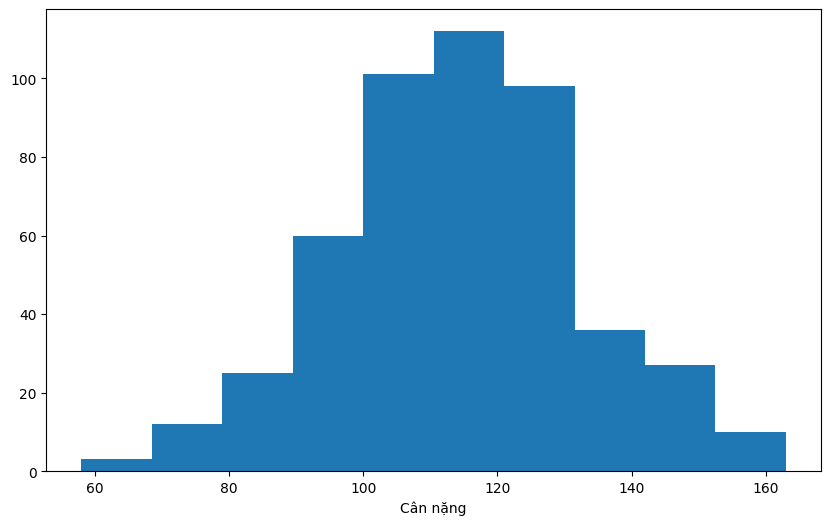

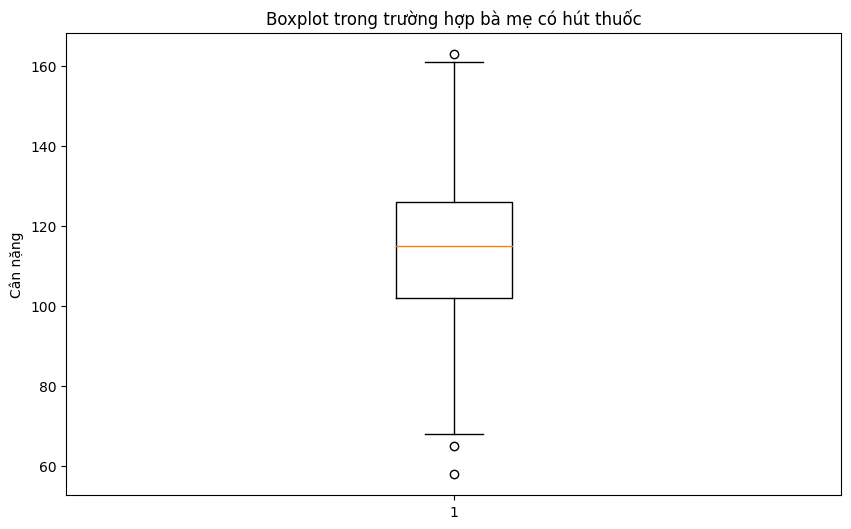

In [55]:
# 1. Dữ liệu cân nặng của trẻ trong trƣờng hợp bà mẹ hút thuốc
# Histogram
plt.figure(figsize=(10, 6)) # Tạo khung mới với kích thước (10, 6)
plt.hist(smokers, bins=10) # Vẽ biểu đồ histogram cho dữ liệu nhóm bà mẹ hút thuốc
plt.xlabel('Cân nặng') # Đặt tên trục x
plt.show() # Hiển thị biểu đồ

# Boxplot
plt.figure(figsize=(10, 6)) # Tạo khung mới với kích thước (10, 6)
plt.boxplot(smokers) # Vẽ biểu đồ boxplot cho dữ liệu nhóm bà mẹ hút thuốc
plt.title('Boxplot trong trường hợp bà mẹ có hút thuốc') # Đặt tên tiêu đề
plt.ylabel('Cân nặng') # Đặt tên trục y
plt.show() # Hiển thị biểu đồ

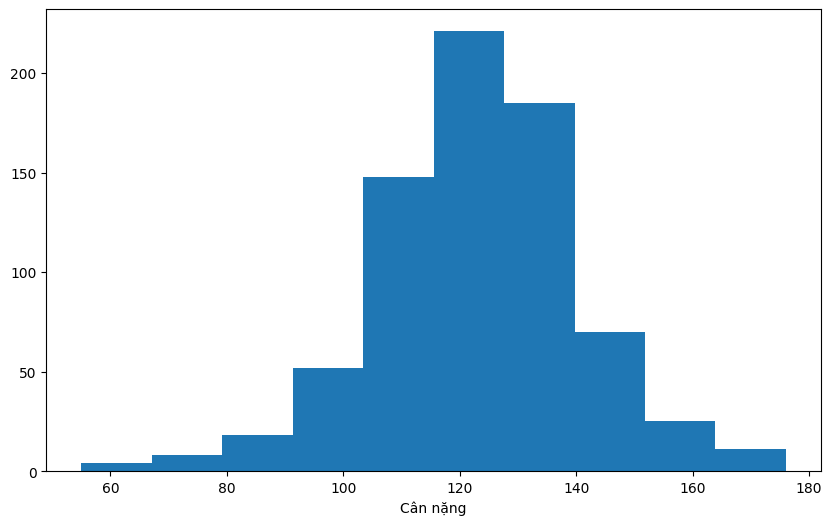

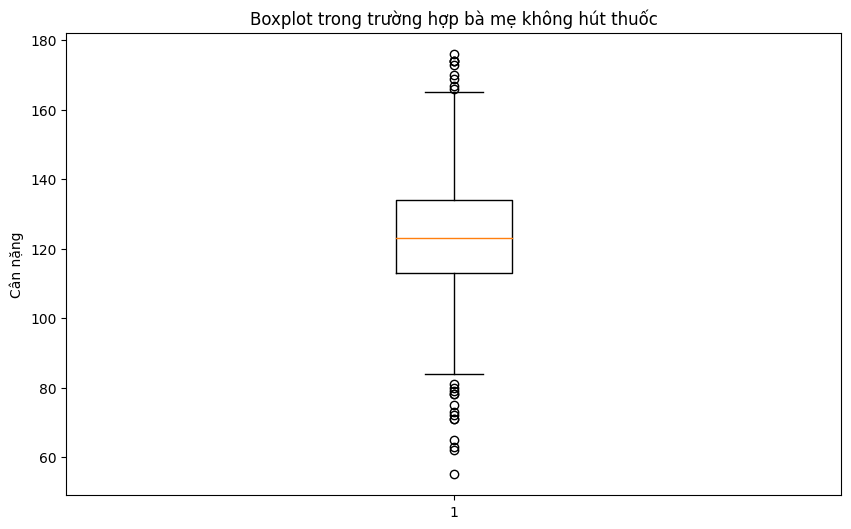

In [56]:
# 2. Dữ liệu cân nặng của trẻ trong trƣờng hợp bà mẹ không hút thuốc
# Histogram
plt.figure(figsize=(10, 6)) # Tạo khung mới với kích thước (10, 6)
plt.hist(non_smokers, bins=10) # Vẽ biểu đồ histogram cho dữ liệu nhóm bà mẹ không hút thuốc
plt.xlabel('Cân nặng') # Đặt tên trục x
plt.show() # Hiển thị biểu đồ

# Boxplot
plt.figure(figsize=(10, 6)) # Tạo khung mới với kích thước (10, 6)
plt.boxplot(non_smokers) # Vẽ biểu đồ boxplot cho dữ liệu nhóm bà mẹ không hút thuốc
plt.title('Boxplot trong trường hợp bà mẹ không hút thuốc') # Đặt tên tiêu đề
plt.ylabel('Cân nặng') # Đặt tên trục y
plt.show() # Hiển thị biểu đồ

So sánh hai tập dữ liệu dựa vào các biểu diễn hình học

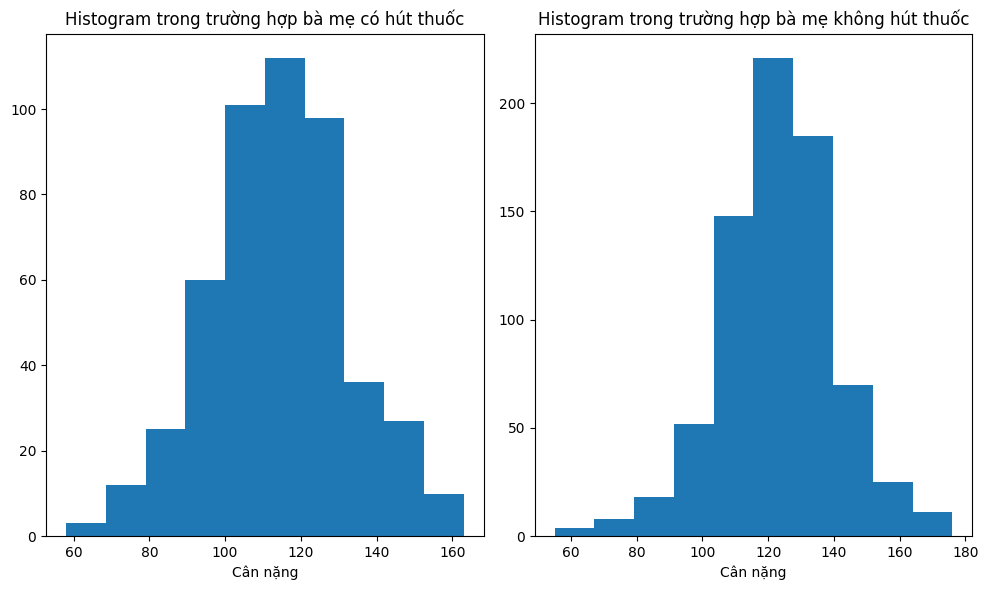

In [57]:
#  Histogram
plt.figure(figsize=(10, 6)) # Tạo khung mới với kích thước (10, 6)

plt.subplot(1, 2, 1) # Tạo một vùng subplot trong một cửa sổ chứa 1 hàng và 2 cột, chuyển đổi tới vùng bên trái
plt.hist(smokers, bins=10) # Vẽ biểu đồ histogram cho dữ liệu nhóm bà mẹ hút thuốc 
plt.title('Histogram trong trường hợp bà mẹ có hút thuốc') # Đặt tên tiêu đề
plt.xlabel('Cân nặng') # Đặt tên trục x

plt.subplot(1, 2, 2) # Tạo một vùng subplot trong một cửa sổ chứa 1 hàng và 2 cột, chuyển đổi tới vùng bên phải
plt.hist(non_smokers, bins=10)  # Vẽ biểu đồ histogram cho dữ liệu nhóm bà mẹ không hút thuốc 
plt.title('Histogram trong trường hợp bà mẹ không hút thuốc') # Đặt tên tiêu đề
plt.xlabel('Cân nặng') # Đặt tên trục x

plt.tight_layout() # Điều chỉnh bố cục
plt.show() # Hiển thị biểu đồ

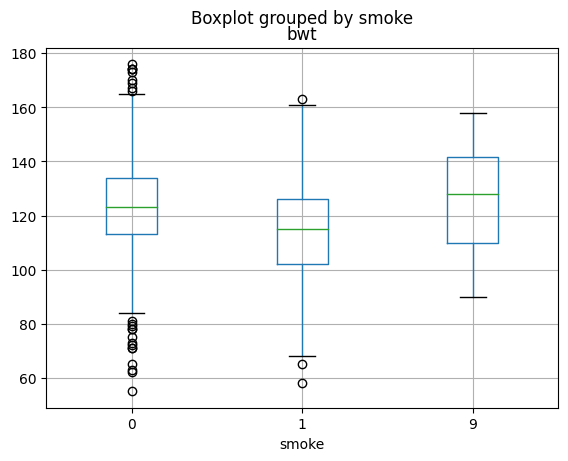

In [58]:
# Boxplot
df.boxplot(column='bwt', by='smoke') #Vẽ biểu đồ boxplot cho cột bwt, nhóm theo cột smoke
plt.show() # Hiển thị biểu đồ

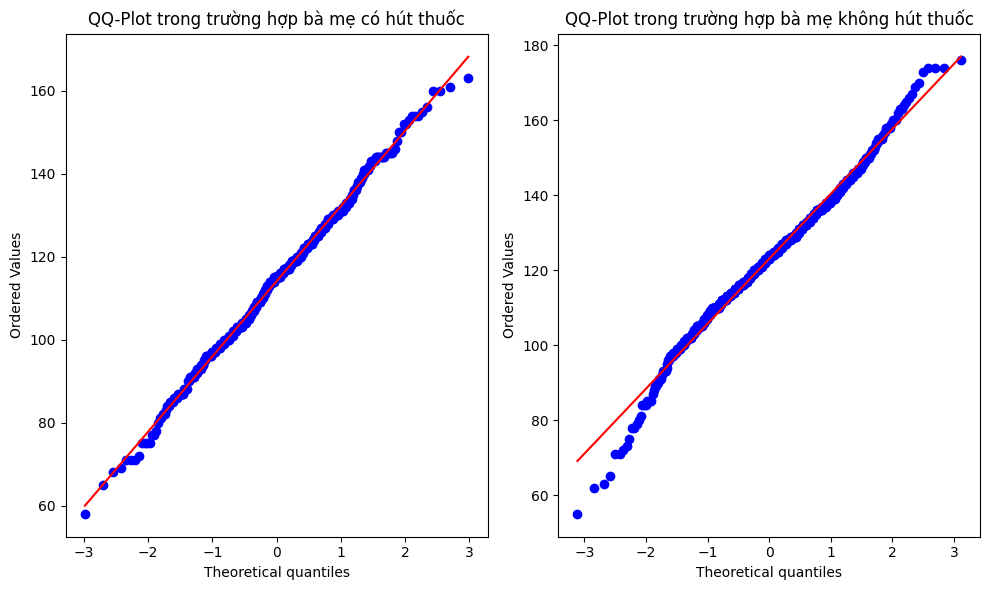

In [59]:
# QQ-Plot
plt.figure(figsize=(10, 6)) # Tạo khung mới với kích thước (10, 6)

plt.subplot(1, 2, 1) # Tạo một vùng subplot trong một cửa sổ chứa 1 hàng và 2 cột, chuyển đổi tới vùng bên trái
stats.probplot(smokers, dist="norm", plot=plt) # Vẽ biểu đồ probability plot cho dữ liệu nhóm bà mẹ hút thuốc
plt.title('QQ-Plot trong trường hợp bà mẹ có hút thuốc') # Đặt tên tiêu đề

plt.subplot(1, 2, 2) # Tạo một vùng subplot trong một cửa sổ chứa 1 hàng và 2 cột, chuyển đổi tới vùng bên phải
stats.probplot(non_smokers, dist="norm", plot=plt) # Vẽ biểu đồ probability plot cho dữ liệu nhóm bà mẹ không hút thuốc
plt.title('QQ-Plot trong trường hợp bà mẹ không hút thuốc') # Đặt tên tiêu đề

plt.tight_layout()
plt.show() # Hiển thị biểu đồ